# Create Colour-Magnitude Diagram of groups
Magnitudes in the Gama Survey are extinction corrected

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

Load dataset with additional information and merge with group CATAID

In [117]:
rawdata = pd.read_csv('data/converted_sample.csv')

In [118]:
data = pd.read_csv('results/galaxy-groups/freq_250_1.0.csv', skiprows=0, index_col=0)

In [119]:
groups = pd.merge(rawdata, data, how='inner', on='CATAID')

In [120]:
len(groups)

27704

In [121]:
groups.columns

Index(['CATAID', 'OBJID', 'RA', 'DEC', 'FIBERMAG_R', 'R_PETRO', 'U_MODEL',
       'G_MODEL', 'R_MODEL', 'I_MODEL', 'Z_MODEL', 'SURVEY_CODE', 'Z', 'NQ',
       'NQ2_FLAG', 'SPECID', 'VEL_ERR', 'NUM_GAMA_SPEC', 'R_SB', 'SG_SEP',
       'SG_SEP_JK', 'K_AUTO', 'RADIO_FLUX', 'HATLAS_FLAG', 'AREA_FLAG',
       'TARGET_FLAGS', 'SURVEY_OLDCLASS', 'SURVEY_CLASS', 'PRIORITY_CLASS',
       'NEIGHBOUR_CLASS', 'TC_V11_ID', 'MASK_IC_10', 'MASK_IC_12', 'VIS_CLASS',
       'VIS_CLASS_USER', 'R_PETRO_ADJ', 'Z_TONRY', 'Z_FOF', 'R_ABSMAG',
       'LOGMSTAR_PETRO', 'LOGMSTAR', 'LOGMSTAR_SERSIC', 'LOGMSTAR_CH',
       'Z_HELIO', 'Z_LG', 'Z_CMB', 'CoDist', 'CoDistTran', 'line_v', 'zeta',
       'RA_rad', 'DEC_rad', 'group'],
      dtype='object')

In [122]:
groups.head(5)

,CATAID,OBJID,RA,DEC,FIBERMAG_R,R_PETRO,U_MODEL,G_MODEL,R_MODEL,I_MODEL,...,Z_HELIO,Z_LG,Z_CMB,CoDist,CoDistTran,line_v,zeta,RA_rad,DEC_rad,group
0,585617,588848899914268964,183.667965,-0.120578,20.297838,19.679222,22.175056,20.818770,19.741850,19.180178,...,0.25000,0.249314,0.251470,1013.690855,1013.690855,67249.174391,0.224319,3.205611,-0.002104,1279
1,585637,588848899914334460,183.798975,-0.060034,19.750658,18.569515,21.399683,19.788664,18.455975,17.959894,...,0.24854,0.247856,0.250007,1008.168452,1008.168452,66898.547688,0.223150,3.207897,-0.001048,1278
2,585640,588848899914334468,183.809312,-0.033410,20.327000,19.670720,23.056776,21.071007,19.627018,19.173925,...,0.25267,0.251985,0.254142,1023.766230,1023.766230,67888.544436,0.226452,3.208078,-0.000583,1277
3,585688,588848899914465353,184.103324,-0.080306,19.039470,17.390420,21.242170,19.004797,17.418460,16.872265,...,0.27558,0.274883,0.277077,1109.645076,1109.645076,73321.386058,0.244574,3.213209,-0.001402,1269
4,585695,588848899914465448,184.113960,-0.143772,18.753643,17.165070,19.915903,17.985886,17.000763,16.613060,...,0.12392,0.123305,0.125239,520.903561,520.903561,35374.174891,0.117996,3.213395,-0.002509,1274


create new columns for (u-g), (g-i), (r-i) and (i-z) colours.

In [123]:
groups['u_g'] = (groups.U_MODEL - groups.G_MODEL)
groups['g_i'] = (groups.G_MODEL - groups.I_MODEL)
groups['r_i'] = (groups.R_MODEL - groups.I_MODEL)
groups['i_z'] = (groups.I_MODEL - groups.Z_MODEL)
groups['g_r'] = (groups.G_MODEL - groups.R_MODEL)

In [124]:
groups.head(5)

,CATAID,OBJID,RA,DEC,FIBERMAG_R,R_PETRO,U_MODEL,G_MODEL,R_MODEL,I_MODEL,...,line_v,zeta,RA_rad,DEC_rad,group,u_g,g_i,r_i,i_z,g_r
0,585617,588848899914268964,183.667965,-0.120578,20.297838,19.679222,22.175056,20.818770,19.741850,19.180178,...,67249.174391,0.224319,3.205611,-0.002104,1279,1.356286,1.638592,0.561672,0.424648,1.076920
1,585637,588848899914334460,183.798975,-0.060034,19.750658,18.569515,21.399683,19.788664,18.455975,17.959894,...,66898.547688,0.223150,3.207897,-0.001048,1278,1.611019,1.828770,0.496081,0.330089,1.332689
2,585640,588848899914334468,183.809312,-0.033410,20.327000,19.670720,23.056776,21.071007,19.627018,19.173925,...,67888.544436,0.226452,3.208078,-0.000583,1277,1.985769,1.897082,0.453093,0.369025,1.443989
3,585688,588848899914465353,184.103324,-0.080306,19.039470,17.390420,21.242170,19.004797,17.418460,16.872265,...,73321.386058,0.244574,3.213209,-0.001402,1269,2.237373,2.132532,0.546195,0.378000,1.586337
4,585695,588848899914465448,184.113960,-0.143772,18.753643,17.165070,19.915903,17.985886,17.000763,16.613060,...,35374.174891,0.117996,3.213395,-0.002509,1274,1.930017,1.372826,0.387703,0.340618,0.985123


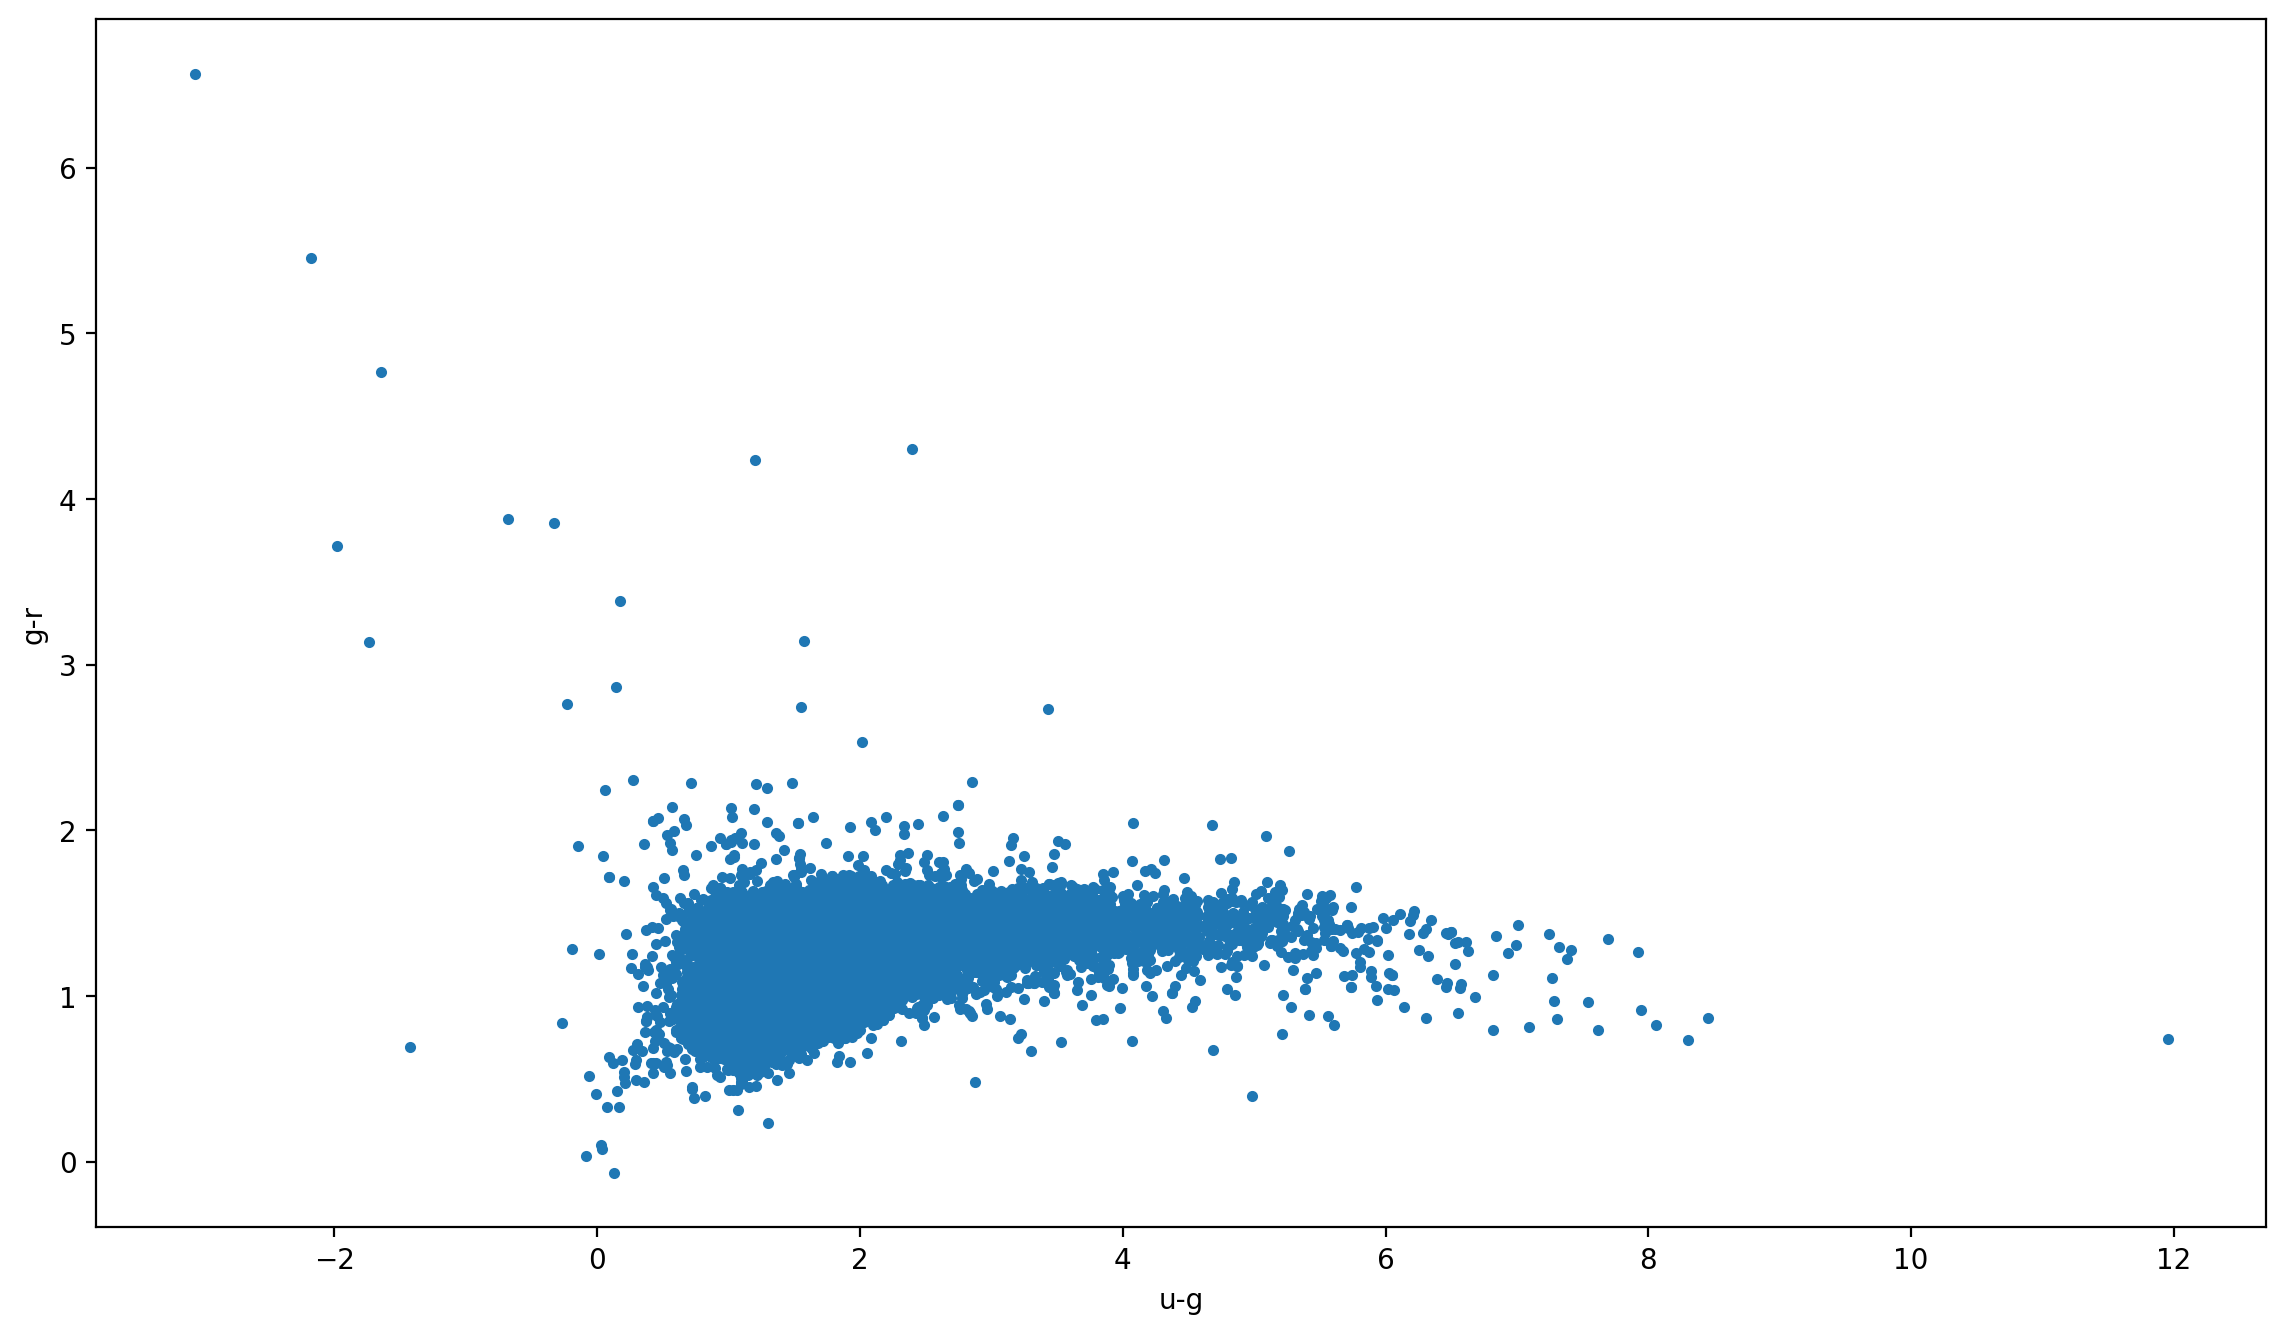

In [125]:
plt.scatter(groups.u_g, groups.g_r, marker=".")
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.show()

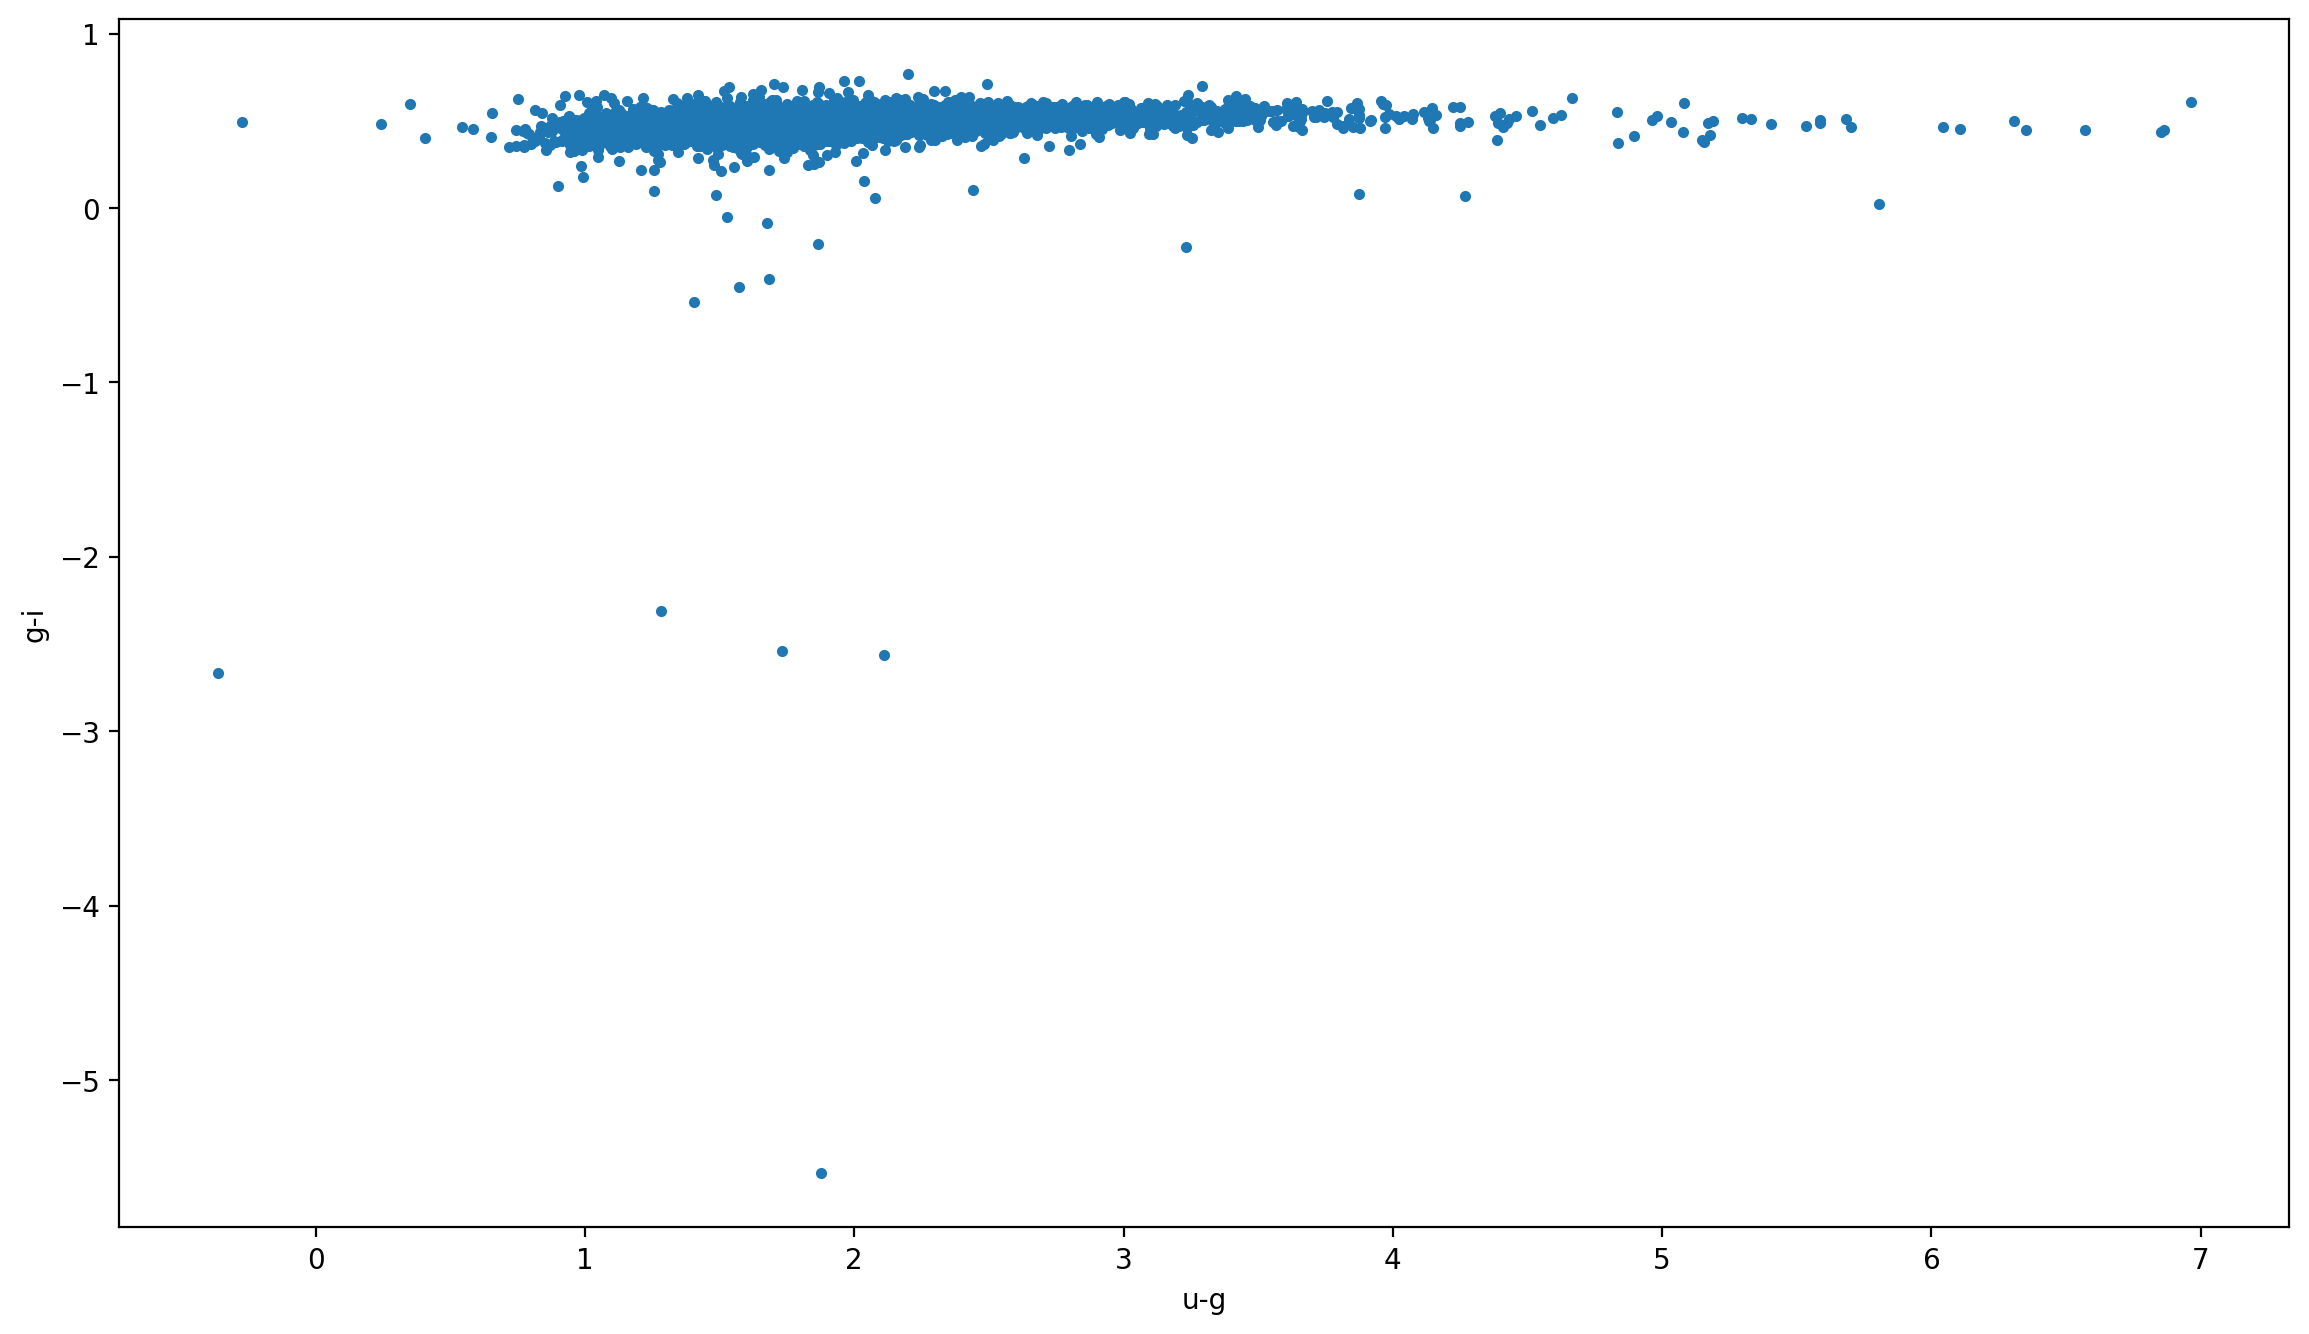

In [126]:
foo = groups.groupby('group')['u_g'].mean()
bar = groups.groupby('group')['r_i'].mean()
plt.scatter(foo, bar, marker=".")
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.xlabel('u-g')
plt.ylabel('g-i')
plt.show()

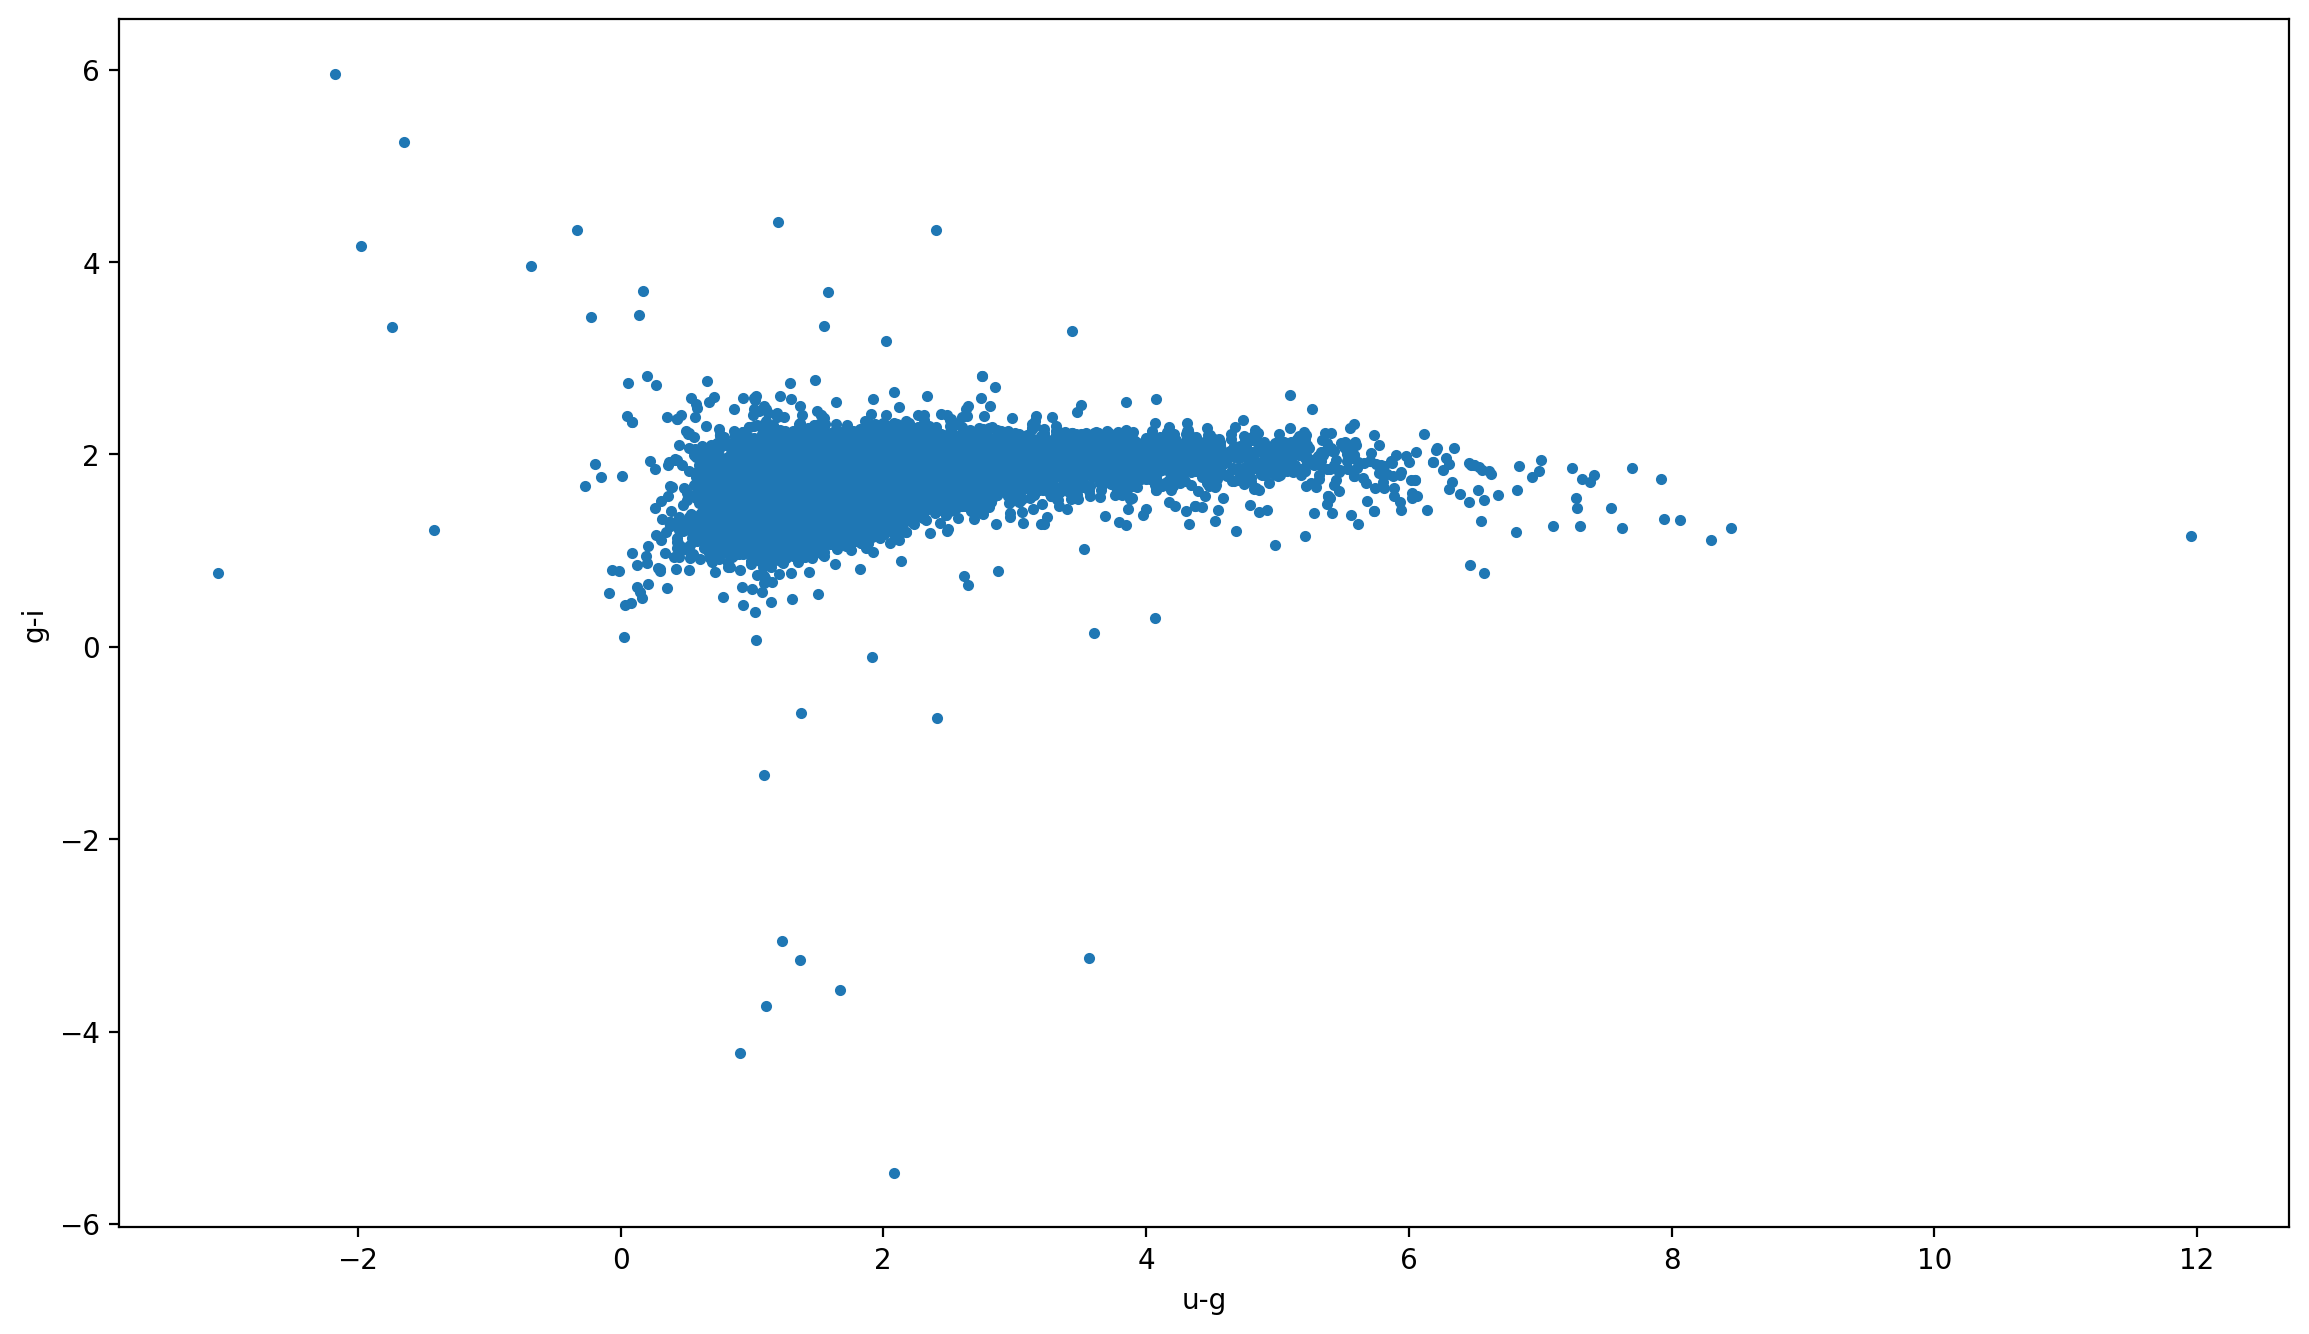

In [127]:
plt.scatter(groups.u_g, groups.g_i, marker=".")
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.xlabel('u-g')
plt.ylabel('g-i')
plt.show()

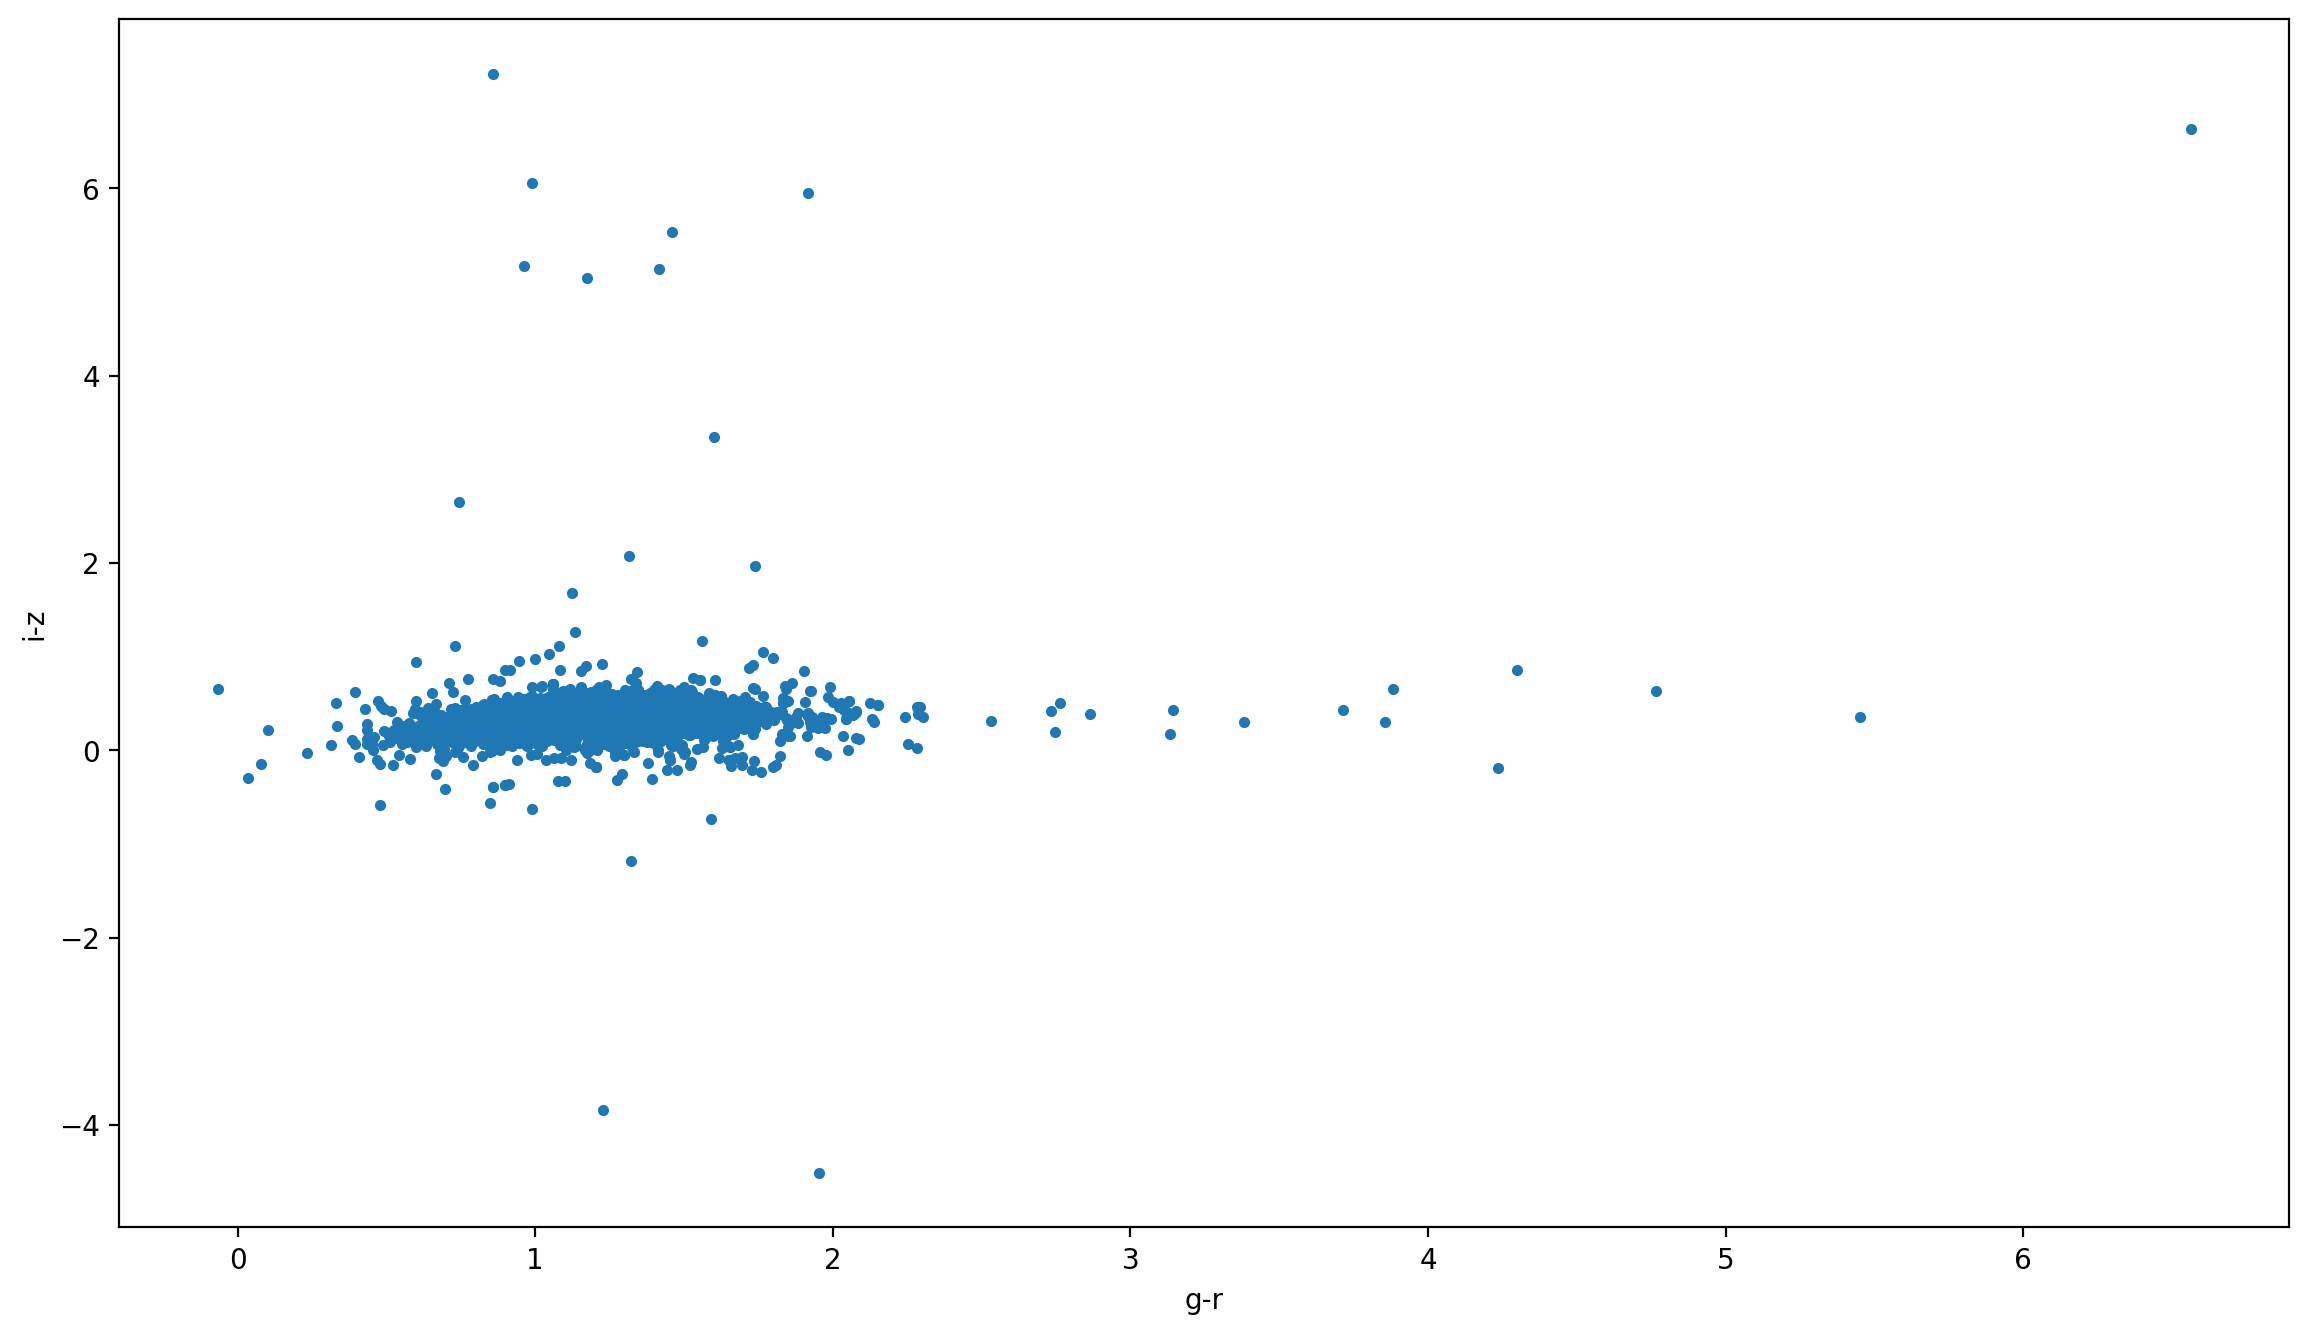

In [128]:
plt.scatter(groups.g_r, groups.i_z, marker=".")
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.xlabel('g-r')
plt.ylabel('i-z')
plt.show()

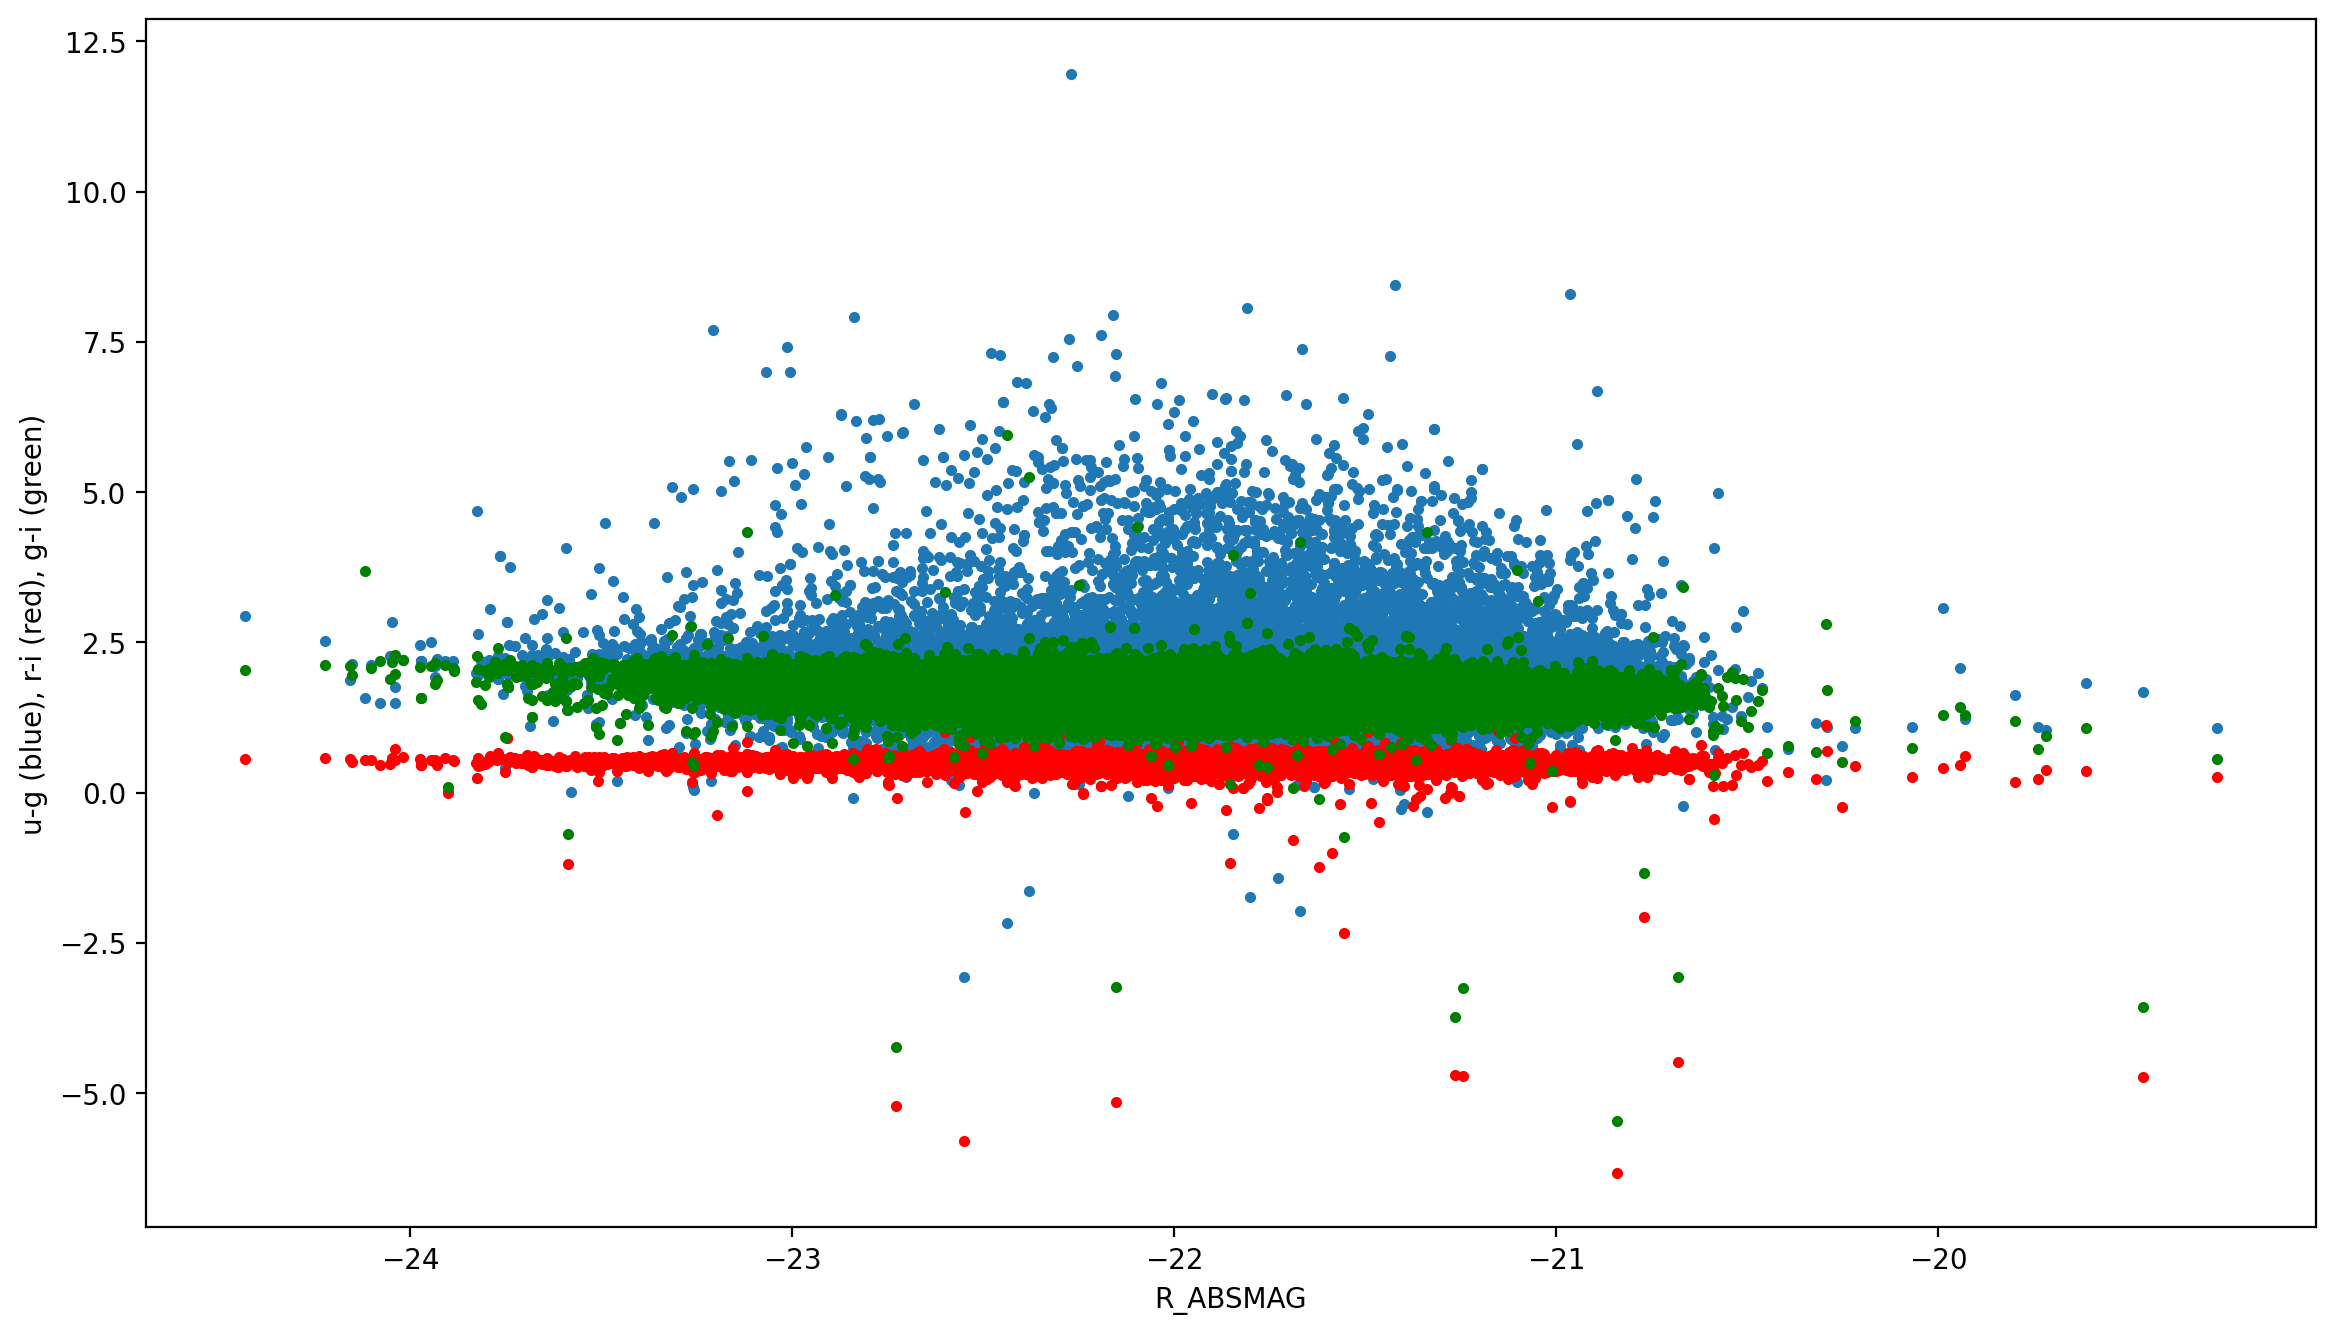

In [138]:
plt.scatter(groups.R_ABSMAG, groups.u_g, marker=".")
plt.scatter(groups.R_ABSMAG, groups.r_i, marker=".", c="red")
plt.scatter(groups.R_ABSMAG, groups.g_i, marker=".", c="green")
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.xlabel('R_ABSMAG')
plt.ylabel('u-g (blue), r-i (red), g-i (green)')
plt.show()

In [130]:
groups.describe()
groups.columns

Index(['CATAID', 'OBJID', 'RA', 'DEC', 'FIBERMAG_R', 'R_PETRO', 'U_MODEL',
       'G_MODEL', 'R_MODEL', 'I_MODEL', 'Z_MODEL', 'SURVEY_CODE', 'Z', 'NQ',
       'NQ2_FLAG', 'SPECID', 'VEL_ERR', 'NUM_GAMA_SPEC', 'R_SB', 'SG_SEP',
       'SG_SEP_JK', 'K_AUTO', 'RADIO_FLUX', 'HATLAS_FLAG', 'AREA_FLAG',
       'TARGET_FLAGS', 'SURVEY_OLDCLASS', 'SURVEY_CLASS', 'PRIORITY_CLASS',
       'NEIGHBOUR_CLASS', 'TC_V11_ID', 'MASK_IC_10', 'MASK_IC_12', 'VIS_CLASS',
       'VIS_CLASS_USER', 'R_PETRO_ADJ', 'Z_TONRY', 'Z_FOF', 'R_ABSMAG',
       'LOGMSTAR_PETRO', 'LOGMSTAR', 'LOGMSTAR_SERSIC', 'LOGMSTAR_CH',
       'Z_HELIO', 'Z_LG', 'Z_CMB', 'CoDist', 'CoDistTran', 'line_v', 'zeta',
       'RA_rad', 'DEC_rad', 'group', 'u_g', 'g_i', 'r_i', 'i_z', 'g_r'],
      dtype='object')

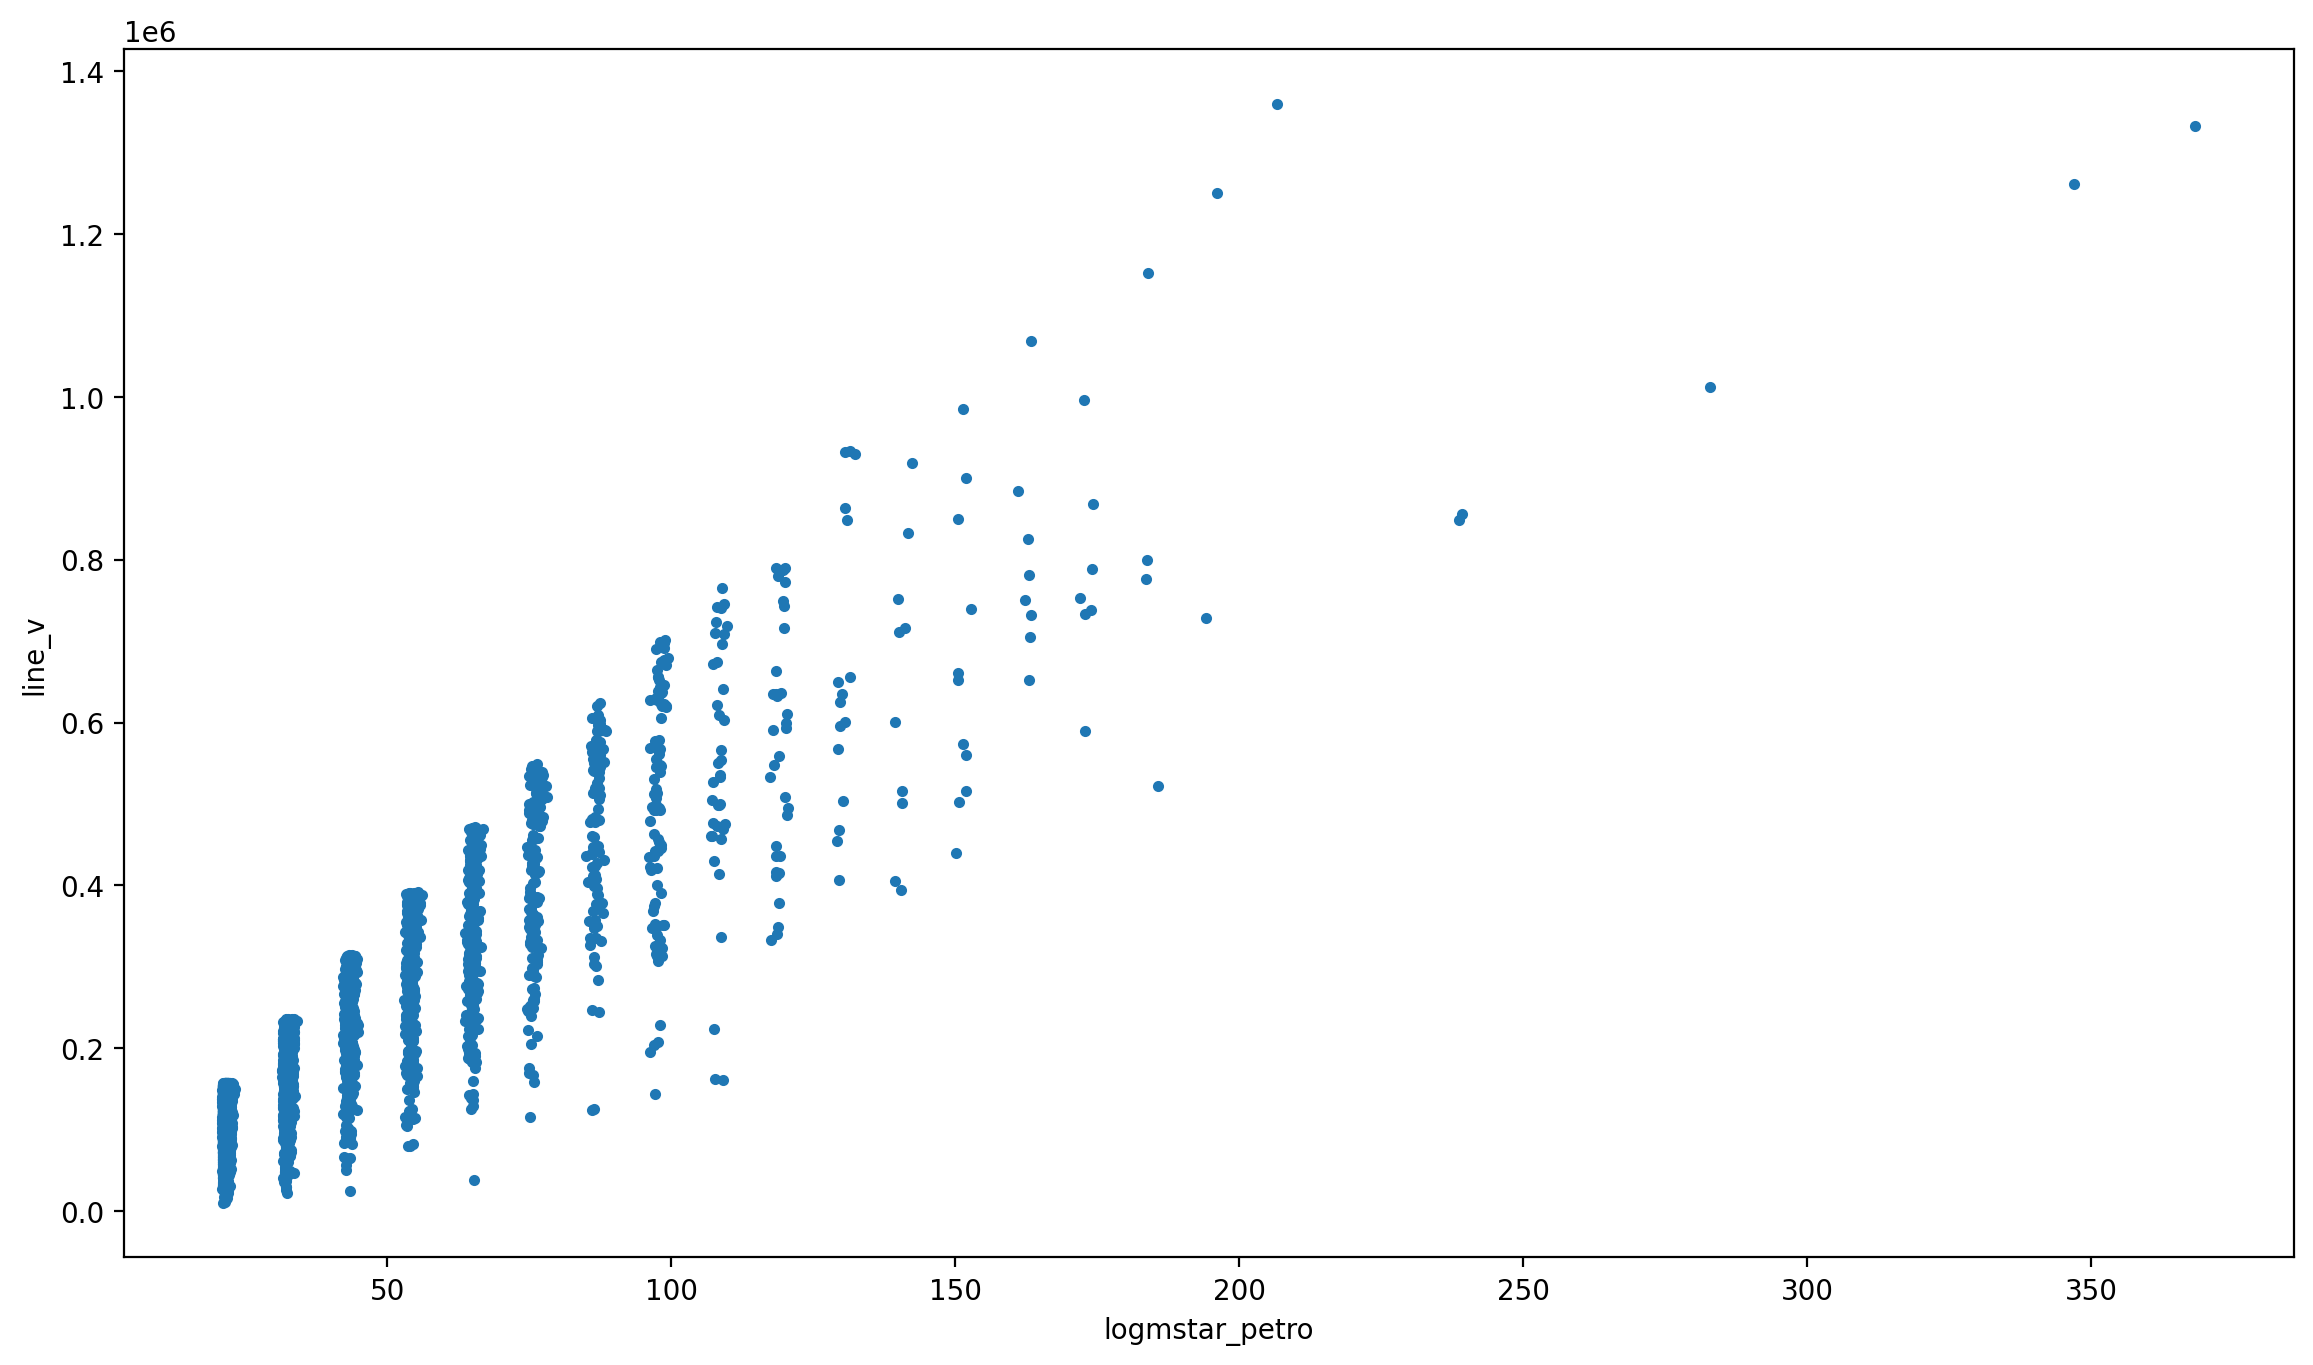

In [131]:
logmstar = groups.groupby('group')['LOGMSTAR_PETRO'].sum()
line_v = groups.groupby('group')['line_v'].sum()
plt.scatter(logmstar, line_v, marker=".")
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.xlabel('logmstar_petro')
plt.ylabel('line_v')
plt.show()

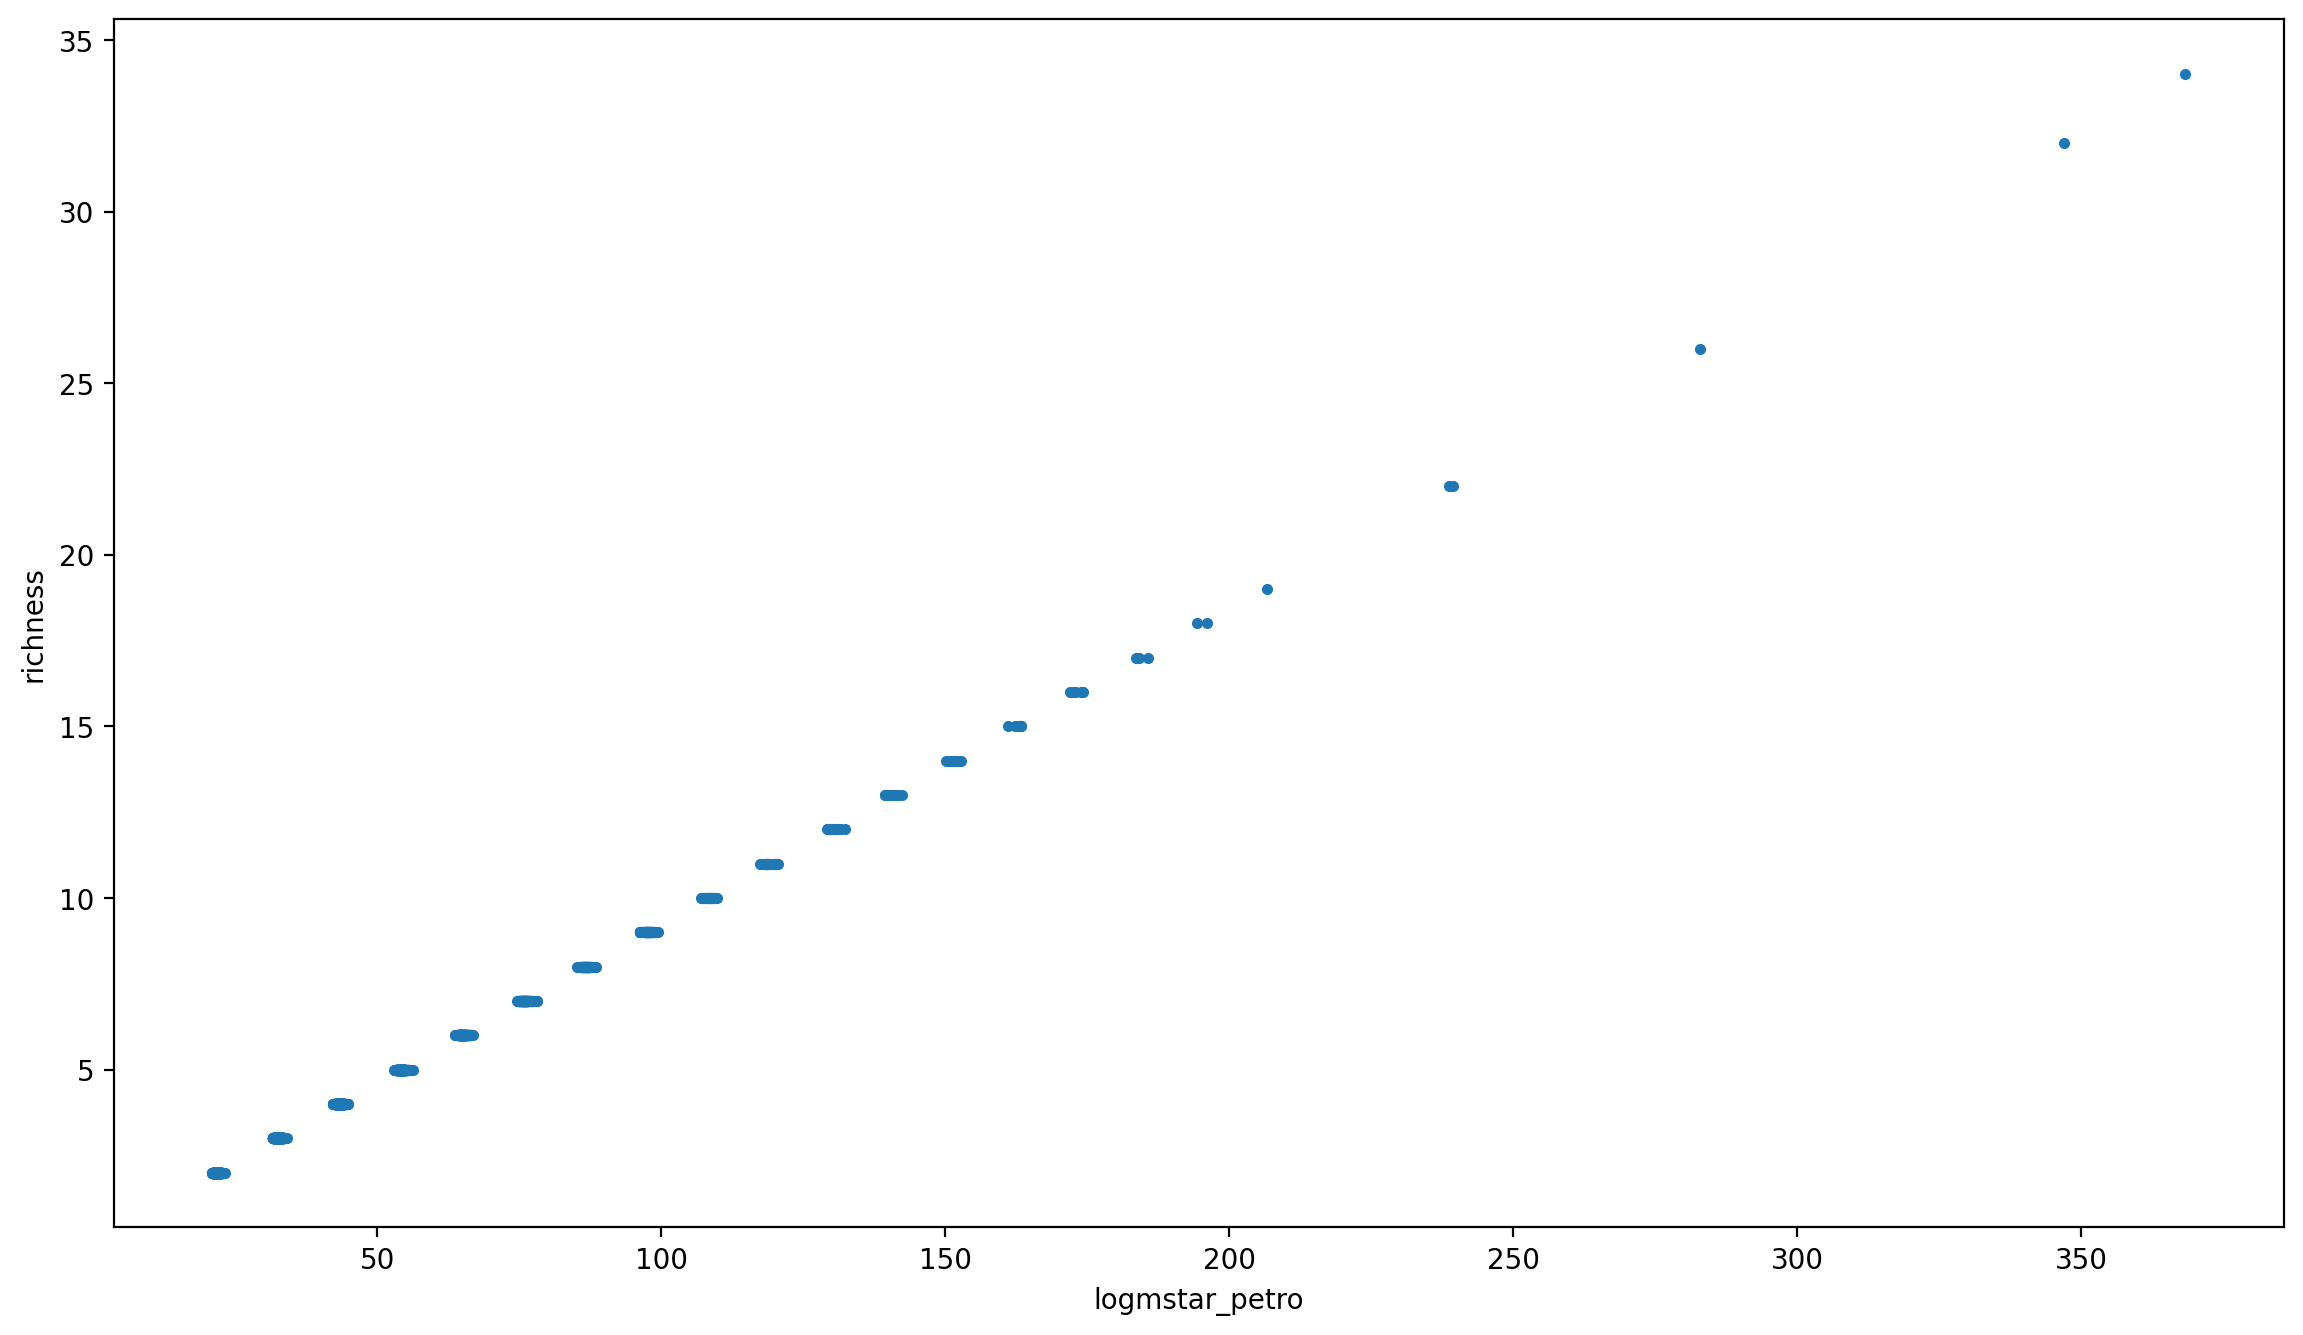

In [132]:
logmstar = groups.groupby('group')['LOGMSTAR_PETRO'].sum()
richness = groups.groupby('group')['CATAID'].count()
plt.scatter(logmstar, richness, marker=".")
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.xlabel('logmstar_petro')
plt.ylabel('richness')
plt.show()

In [133]:
logmstar = groups.groupby('group')['LOGMSTAR_PETRO'].sum()
richness = groups.groupby('group')['CATAID'].count()

In [134]:
logmstar.head(5)

group
1    21.596460
2    32.575704
3    21.643089
4    22.040603
5    32.980889
Name: LOGMSTAR_PETRO, dtype: float64

In [135]:
richness.head(5)

group
1    2
2    3
3    2
4    2
5    3
Name: CATAID, dtype: int64